## 스팸 분류기

다운로드 데이터 : [https://www.kaggle.com/uciml/sms-spam-collection-dataset]( https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [1]:
#필요한 라이브러리 호출

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# 데이터 확인
data = pd.read_csv('spam.csv',encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [4]:
# 불필요한 컬럼 삭제 후 스팸과 일반 메세지 0,1로 변환
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#데이터 형식 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
# 결측치 확인
data.isnull().values.any()

False

In [7]:
#데이터 중복 확인
data['v2'].nunique(), data['v1'].nunique()
# 5572 개의 데이터 중에 중복을 제거한 5169 데이터 이며 v1데이터는 0,1로 이루어져 있어 데이터가 2개로 출력ㄱ

(5169, 2)

In [8]:
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거

In [9]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


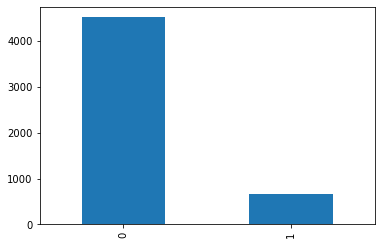

In [10]:
# 스팸메일의 유무를 의미하는 레이블 값 시각화
data['v1'].value_counts().plot(kind='bar');

In [11]:
#0 으로 표시된값이 정상메일 
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


In [12]:
# 4516개의 정상 데이터와 653개의 스팸 데이터
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [14]:
print(sequences[:5])

[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015], [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152], [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438]]


In [15]:
# sequences 에는 X_data의 단어들이 각 단어에 매핑되는 정수인코딩 되어 저장
word_to_index = tokenizer.word_index
print(word_to_index)

#빈도수가 높을수록 낮은 정수가 부여됨

borate': 7727, 'willpower': 7728, 'absence': 7729, 'answerin': 7730, 'åè10': 7731, 'evey': 7732, 'prin': 7733, 'gsoh': 7734, 'spam': 7735, 'gigolo': 7736, 'mens': 7737, 'oncall': 7738, 'mjzgroup': 7739, '08714342399': 7740, '50rcvd': 7741, 'ashwini': 7742, '08707500020': 7743, 'ukp': 7744, '09061790125': 7745, 'thet': 7746, 'skinny': 7747, 'casting': 7748, 'elections': 7749, 'shouldn\x89û÷t': 7750, '116': 7751, 'hlday': 7752, 'camp': 7753, 'amrca': 7754, 'serena': 7755, 'prescribed': 7756, 'meatballs': 7757, 'approve': 7758, 'panalam': 7759, 'spjanuary': 7760, 'fortune': 7761, 'allday': 7762, 'perf': 7763, 'outsider': 7764, 'receipts\x89ûówell': 7765, 'what\x89û÷s': 7766, '98321561': 7767, 'familiar': 7768, 'depression': 7769, 'infact': 7770, 'simpsons': 7771, 'band': 7772, 'canåõt': 7773, 'isnåõt': 7774, 'shite': 7775, 'kip': 7776, 'hont': 7777, 'amanda': 7778, 'regard': 7779, 'renewing': 7780, 'upgrading': 7781, 'subject': 7782, 'nannys': 7783, 'puts': 7784, 'perspective': 7785, 'con

In [16]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


In [17]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8921


In [18]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


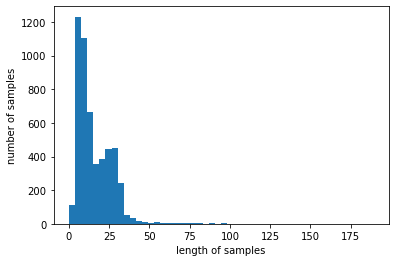

In [19]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
max_len = 189
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (5169, 189)


In [21]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

### 모델 설계

In [22]:
#RNN 을 이용한 스팸 메일 분류
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 2s 37ms/step - loss: 0.5081 - acc: 0.7890 - val_loss: 0.2083 - val_acc: 0.9432
Epoch 2/4
52/52 [==============================] - 2s 33ms/step - loss: 0.1784 - acc: 0.9507 - val_loss: 0.1059 - val_acc: 0.9722
Epoch 3/4
52/52 [==============================] - 2s 34ms/step - loss: 0.0828 - acc: 0.9809 - val_loss: 0.0622 - val_acc: 0.9807
Epoch 4/4
52/52 [==============================] - 2s 34ms/step - loss: 0.0453 - acc: 0.9860 - val_loss: 0.0562 - val_acc: 0.9831


In [25]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 8ms/step - loss: 0.0562 - acc: 0.9826

 테스트 정확도: 0.9826


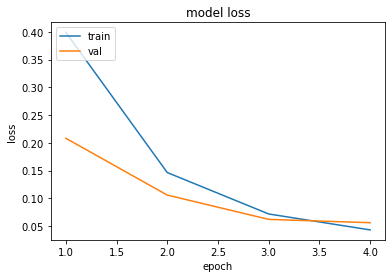

In [26]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()